In [95]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import os
import utils 
import importlib
from subprocess import run
importlib.reload(utils)


DATA = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/Associations/data'
os.environ['R_HOME'] = '/burg/pmg/users/ic2465/miniforge3/envs/manu-copangraph/bin/R'

# Print the current R_HOME

In [2]:
#ADONIS
def run_adonis(X_fl, outcome_fl):
    X_fl = X_fl.replace('.pkl', '.csv')
    if not os.path.exists(X_fl):
        print('making csv')
        x = pd.read_pickle(X_fl.replace('csv', 'pkl'))
        x.to_csv(X_fl)
    else:
        print('csv exists')
    assert(os.path.exists(X_fl))
    cmd = f'Rscript adonis.R {X_fl} {outcome_fl}'
    run(cmd, shell=True)
    adonis_fl = X_fl.replace('.csv', '_adonis.csv')
    adonis = pd.read_csv(adonis_fl)
    return adonis 

# LASSO
def run_lasso(X, y, split=False, penalty='l1', C=0.1):
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    if split:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
    else:
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    if penalty == 'elasticnet':
        solver = 'saga'
        l1_ratio = 0.5
    else:
        solver = 'liblinear'
        l1_ratio = None
    lasso = LogisticRegression(penalty=penalty, solver=solver, C=C, random_state=101, l1_ratio=l1_ratio)
    lasso.fit(X_train, y_train)
    y_pred_prob = lasso.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred_prob)
    print(f'AUROC: {auroc}')
    RocCurveDisplay.from_estimator(lasso, X_test, y_test)




In [108]:
# DO NOT RUN

MOMSPI_FILT_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/rkbm_abnd_mat/graph_02.abnd_mat_filtered.pkl'
MOMSPI_FILT_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/rkbm_abnd_mat/graph_05.abnd_mat_filtered.pkl'
ACUVRE_FILT_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vremdro_02.abnd_mat_filtered.pkl'
ACUVRE_FILT_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vremdro_05.abnd_mat_filtered.pkl'
ACUALL_FILT_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/allmdro_02.abnd_mat_filtered.pkl'
ACUALL_FILT_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/allmdro_05.abnd_mat_filtered.pkl'
CRC_FILT_02 =    '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/CRC/graph_02.abnd_mat_filtered.pkl'

# CRUMPLE FIX 1
CF1_MOMSPI_FILT_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/graph_02_crplfx_sym.abnd_mat_filtered.pkl'
CF1_ACUVRE_FILT_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vre_mdro_02_crmplfx_ospp.abnd_mat.pkl'



In [91]:
MOMSPI_OUTCOME='/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/outcome.csv'
ACU_ALL_OUTCOME='/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/Outcome_allmdro_allclr_txany_abxany_w3-28_seqALL_mr5_sd02.outcome.csv'
ACU_VRE_OUTCOME='/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/Outcome_vremdro_allclr_txany_abxany_w3-28_seqALL_mr5_sd02.outcome.csv'
ACU_VRE_OUTCOME_ADONIS='/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vre_mdro.outcome.csv'
CRC_OUTCOME = '/manitou/pmg/projects/korem_lab/Projects/CRC_COPAN_PREDICTION/metadata_gut.xlsx'


In [96]:

momspi_outcome = utils.get_outcome(MOMSPI_OUTCOME)
vre_outcome = utils.get_outcome(ACU_VRE_OUTCOME)
mdro_outcome = utils.get_outcome(ACU_ALL_OUTCOME)
crc_outcome = utils.get_outcome(CRC_OUTCOME)
vre_outcome

StoolID
30004    1
30029    1
30006    1
30007    1
30025    1
        ..
31708    0
31428    0
31777    1
32088    0
32015    1
Name: Outcome, Length: 62, dtype: int64

In [93]:
#run_adonis(CF1_MOMSPI_FILT_02, MOMSPI_OUTCOME)
run_adonis(CF1_ACUVRE_FILT_02, ACU_VRE_OUTCOME_ADONIS)

csv exists


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-8

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vre_mdro_02_crmplfx_ospp.abnd_mat_filtered.csv"
[2] "/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vre_mdro.outcome.csv"                          
 [1] "30004" "30029" "30006" "30007" "30025" "30661" "30030" "31071" "30038"
[10] "30966" "31068" "30049" "30219" "30145" "30096" "30068" "30891" "30346"
[19] "30094" "30239" "30779" "30493" "30434" "30537" "30230" "30974" "30316"
[28] "30708" "30736" "30435" "30578" "30839" "30468" "31581" "30582" "30616"
[37] "30880" "30810" "30758" "31098" "31331" "30848" "30725" "31086" "31043"
[46] "30921" "30801" "30940" "31252" "30875" "31218" "31106" "31110" "31431"
[55] "31246" "31268" "31409" "31708" "31428" "31777" "32088" "32015"
 [1] "30004" "30029" "30006" "30007" "30025" "30661" "30030" "31071" "30038"
[10] "30966" "31068" "30049" "30219" "30145" "30096" "30068" "30891" "30346"
[19] "30094" "30239" "30779" "30493" "30434" "30537" "30230" "30974" 

,Df,SumOfSqs,R2,F,Pr(>F),rbkm_t,nonz_prop,method,dof
0,1,1.270198e+09,0.006957,0.420333,0.7386,10,0.0,euclidean,Model
1,60,1.813131e+11,0.993043,NaN,NaN,10,0.0,euclidean,Residual
2,61,1.825833e+11,1.000000,NaN,NaN,10,0.0,euclidean,Total
3,1,2.633696e-01,0.011021,0.668616,0.8994,10,0.0,bray,Model
4,60,2.363416e+01,0.988979,NaN,NaN,10,0.0,bray,Residual
5,61,2.389753e+01,1.000000,NaN,NaN,10,0.0,bray,Total
6,1,1.267570e+09,0.006943,0.419478,0.7492,50,0.0,euclidean,Model
7,60,1.813068e+11,0.993057,NaN,NaN,50,0.0,euclidean,Residual
8,61,1.825744e+11,1.000000,NaN,NaN,50,0.0,euclidean,Total
9,1,3.106744e-01,0.012126,0.736478,0.8088,50,0.0,bray,Model


AUROC: 0.49999999999999994


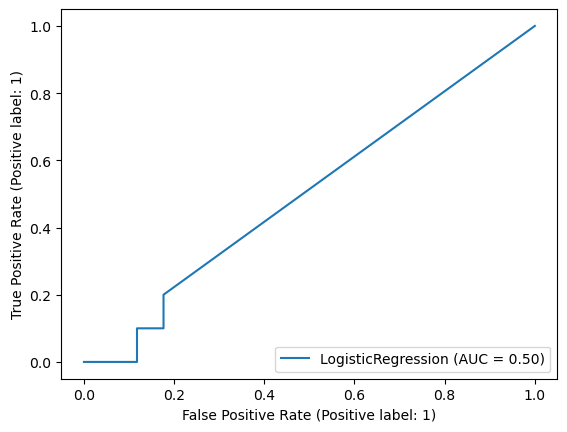

In [78]:
#lasso
abnd = pd.read_pickle(MOMSPI_FILT_02).T
abnd = abnd.loc[momspi_outcome.index,:]
run_lasso(abnd, momspi_outcome, penalty='l1', C=0.1, split=True)

In [126]:
# ACU_VRE_02 analysis 
#degree = pd.read_pickle(os.path.join(DATA, 'degree_vreacu_02.pkl')) # degree of each node in the gfa

abnd = pd.read_pickle(os.path.join(CF1_ACUVRE_FILT_02)).T # abundance matrix calculated with compute_abundance_matrix.py
abnd = abnd.loc[vre_outcome.index, :]  # make sure ordering is the same. For ACU, drop multiple samples per patient
abnd

#degree = degree[abnd.columns] # select only those nodes in abnd. 

## filter X
print(abnd.shape)
##X = abnd.loc[:, degree > 1]
X = utils.top_percentile_filter(abnd, 100)
X = utils.count_filter(X, filt=25)
X = utils.abundance_filter(X, filt=0.30, binarize=True)
print(X.shape)
#
# mwu
res = utils.compute_mwu_tests(vre_outcome, X)
fdrres = utils.fdr_correct(res)
print('rejected without clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())
#
## cluster analysis
clstrs = utils.get_cluster_averages(X, corr=0.90)
print('num clusters: ', clstrs.shape[1])
res = utils.compute_mwu_tests(vre_outcome, clstrs)
fdrres = utils.fdr_correct(res)
print('rejected with clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())




(62, 2390766)
(62, 7897)
rejected without clustering:  0
lowest p-value:  0.001264566158219757
lowest p-corr:  0.5897702861864478
num clusters:  452
rejected with clustering:  0
lowest p-value:  0.0020170004257661018
lowest p-corr:  0.5083275236443345


In [ ]:

# ACU_ALL 02 analysis 
outcome = pd.read_pickle(os.path.join(DATA, 'mdro_outcome.pkl'))
degree = pd.read_pickle(os.path.join(DATA, 'degree_allacu_02.pkl'))
abnd = pd.read_pickle(os.path.join(DATA, 'acuall_filt_02.pkl')).T
abnd = abnd.loc[outcome.index, :]  

degree = degree[abnd.columns] # select only those nodes in abnd

# filter X
print(abnd.shape)
X = abnd.loc[:, degree > 2]
X = associations.top_percentile_filter(X, 99.0)
X = associations.count_filter(X, filt=20)
X = associations.abundance_filter(X, filt=0.2, binarize=True)
print(X.shape)

# mwu
res = associations.compute_mwu_tests(outcome, X)
fdrres = associations.fdr_correct(res)
print('rejected without clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())

# cluster analysis
clstrs = associations.get_cluster_averages(X, corr=0.8)
print('num clusters: ', clstrs.shape[1])
res = associations.compute_mwu_tests(outcome, clstrs)
fdrres = associations.fdr_correct(res)
print('rejected with clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())




(95, 3341493)
(95, 8499)
rejected without clustering:  0
lowest p-value:  7.620652565566547e-05
lowest p-corr:  0.6476792615475009
num clusters:  511
rejected with clustering:  1
lowest p-value:  7.620652565566547e-05
lowest p-corr:  0.03894153461004506


In [127]:

# CRC 02 analysis 
outcome = pd.read_pickle(os.path.join(DATA, 'crc_outcome.pkl'))
degree = pd.read_pickle(os.path.join(DATA, 'degree_crc.pkl'))
abnd = pd.read_pickle(os.path.join(DATA, 'crc_filt_02.pkl')).T
abnd = abnd.loc[outcome.index, :]

degree = degree[abnd.columns] # select only those nodes in abnd

# filter X
print(abnd.shape)
X = abnd.loc[:, degree > 2]
X = associations.top_percentile_filter(X, 98.0)
X = associations.count_filter(X, filt=5)
X = associations.abundance_filter(X, filt=0.3, binarize=True)
print(X.shape)

# mwu
res = associations.compute_mwu_tests(outcome, X)
fdrres = associations.fdr_correct(res)
print('rejected without clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())

## cluster analysis
#clstrs = associations.get_cluster_averages(X, corr=0.8)
#print('num clusters: ', clstrs.shape[1])
#res = associations.compute_mwu_tests(outcome, clstrs)
#fdrres = associations.fdr_correct(res)
#print('rejected with clustering: ', fdrres.rejected.sum())
#print('lowest p-value: ', fdrres.pval.min())
#print('lowest p-corr: ', fdrres.pval_corr.min())

FileNotFoundError: [Errno 2] No such file or directory: '/burg/pmg/users/ic2465/Projects/MANU_copangraph/Associations/crc_outcome.pkl'

In [42]:
# MOMSPI_02 analysis 
outcome = pd.read_pickle(os.path.join(DATA, 'momspi_outcome.pkl'))
#degree = pd.read_pickle(os.path.join(DATA, 'degree_momspi_02.pkl'))
abnd = pd.read_pickle(CF1_MOMSPI_FILT_02).T
abnd = abnd.loc[outcome.index, :]

#degree = degree[abnd.columns] # select only those nodes in abnd

# filter X
print(abnd.shape)
#X = abnd.loc[:, degree > 1]
X = utils.top_percentile_filter(abnd, 100)
X = utils.count_filter(X, filt=60)
X = utils.abundance_filter(X, filt=0.25, binarize=True)
print(X.shape)
#
## mwu
res = utils.compute_mwu_tests(outcome, X)
fdrres = utils.fdr_correct(res)
print('rejected without clustering: ', fdrres.rejected.sum())
print('lowest p-value: ', fdrres.pval.min())
print('lowest p-corr: ', fdrres.pval_corr.min())
fdrres[fdrres.rejected]
#
## cluster analysis
#clstrs = utils.get_cluster_averages(X, corr=0.9)
#print('num clusters: ', clstrs.shape[1])
#res = utils.compute_mwu_tests(outcome, clstrs)
#fdrres = utils.fdr_correct(res)
#print('rejected with clustering: ', fdrres.rejected.sum())
#print('lowest p-value: ', fdrres.pval.min())
#print('lowest p-corr: ', fdrres.pval_corr.min())
#sns.stripplot(x=outcome, y=abnd.loc[:, 79288])

(87, 590056)
(87, 9741)
rejected without clustering:  17
lowest p-value:  8.86973532442189e-06
lowest p-corr:  0.03523352398399166


,statistic,pval,rejected,pval_corr
79288,1309.5,0.000009,True,0.035234
79290,1309.5,0.000009,True,0.035234
79294,1256.5,0.000069,True,0.047577
79295,1281.0,0.000028,True,0.044981
79298,1305.5,0.000011,True,0.035234
79299,1282.0,0.000026,True,0.044981
79300,1257.5,0.000066,True,0.047577
81764,1255.5,0.000072,True,0.047577
81767,1253.5,0.000079,True,0.047577
81774,1252.5,0.000083,True,0.047577


In [47]:
# DO NOT RUN

MOMSPI_GFA_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/graph_02.gfa'
ACUALL_GFA_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/allmdro_02.gfa'
ACUVRE_GFA_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vremdro_02.gfa'
MOMSPI_GFA_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/moms-pi/graph_05.gfa'
ACUALL_GFA_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/allmdro_05.gfa'
ACUVRE_GFA_05 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/ACU/vremdro_05.gfa'
CRC_GFA_02 = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Associations/CRC/graph_02.gfa'

adjM = utils.calc_adjM(MOMSPI_GFA_02)
degree_momspi_02 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(ACUALL_GFA_02)
degree_allacu_02 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(ACUVRE_GFA_02)
degree_vreacu_02 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(MOMSPI_GFA_05)
degree_momspi_05 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(ACUALL_GFA_05)
degree_allacu_05 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(ACUVRE_GFA_05)
degree_vreacu_05 = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

adjM = utils.calc_adjM(CRC_GFA_02)
degree_crc = np.array(adjM.sum(axis=0)).reshape((adjM.shape[0]))

In [49]:
# DO NOT RUN

# DATA DUMP  -
os.makedirs('./data', exist_ok=True)

# write outcomes
momspi_outcome.to_pickle('./data/momspi_outcome.pkl')
vre_outcome.to_pickle('./data/vre_outcome.pkl')
mdro_outcome.to_pickle('./data/mdro_outcome.pkl')
crc_outcome.to_pickle('./data/crc_outcome.pkl')

# write degree data. For _02 only
pd.Series(degree_momspi_02).to_pickle('./data/degree_momspi_02.pkl')
pd.Series(degree_momspi_05).to_pickle('./data/degree_momspi_05.pkl')

pd.Series(degree_allacu_02).to_pickle('./data/degree_allacu_02.pkl')
pd.Series(degree_allacu_05).to_pickle('./data/degree_allacu_05.pkl')

pd.Series(degree_vreacu_02).to_pickle('./data/degree_vreacu_02.pkl')
pd.Series(degree_vreacu_05).to_pickle('./data/degree_vreacu_05.pkl')

pd.Series(degree_crc).to_pickle('./data/degree_crc.pkl')

#  write abnd
# _02, _05 refers to sequence divergence = 0.02, 0.05
pd.read_pickle(MOMSPI_FILT_02).to_pickle('./data/momspi_filt_02.pkl')
pd.read_pickle(MOMSPI_FILT_05).to_pickle('./data/momspi_filt_05.pkl')

pd.read_pickle(ACUVRE_FILT_02).to_pickle('./data/acuvre_filt_02.pkl')
pd.read_pickle(ACUVRE_FILT_05).to_pickle('./data/acuvre_filt_05.pkl')

pd.read_pickle(ACUALL_FILT_02).to_pickle('./data/acuall_filt_02.pkl')
pd.read_pickle(ACUALL_FILT_05).to_pickle('./data/acuall_filt_05.pkl')

pd.read_pickle(CRC_FILT_02).to_pickle('./data/crc_filt_02.pkl')
